# Técnicas de Jacobi y Gauss-Seidel
La idea es escribir la matriz $A$

$$A = L + D + U $$
$L=(a_{ij})$ con $0$ si $i \le j$
$D=(a_{ii})$ diagonal
$U=(a_{ij})$ con $0$ si $i \ge j$

Del sistema $A \mathbf{x} = b$
despejamos de forma que la $D$ este a la izquierda

$$A \mathbf{x} = (L + D + U) \mathbf{x} = \mathbf{b}  $$
$$D \mathbf{x} = -(L + U) \mathbf{x} + \mathbf{b}  $$

Como $D$ es invertible $a_{ii} \ne 0$, $i=1,2 \cdots, n$.
multiplicamos a ambos lados por $D^{-1}$

$$\mathbf{x} = -D^{-1} ( L + U ) \mathbf{x} + D^{-1} \mathbf{b}  $$

Llevamos esto al sistema iterativo.
$$\mathbf{x}_k = -D^{-1} ( L + U ) \mathbf{x}_{k-1} + D^{-1} \mathbf{b}  \tag{1} $$

Esto corresponde el sistema

$$\mathbf{x}_k = T_J \mathbf{x}_{k-1} + \mathbf{c}  $$
Donde

$$T_J = -D^{-1} ( L + U) \quad , \quad  \mathbf{c}=D^{-1} \mathbf{b}  $$

Esto lo podemos llevar a termino de componentes. Mirando la Ecuacion (1)

$$x_i^{(k)} = \frac{1}{a_{ii}}  \left [  \sum_{j=1, j \ne i}^n (-a_{ij}) x_j^{(k-1} + b_i  \right ].  $$
Esta  es la iteraci'on Jacobi.


Esto lo podemos pensar de otra forma

$$\sum a_{ij} x_j = b_i $$

* De la primera ecuacion $i=1$, despejamos $x_1$.
* De la segunda ecuacion $i=2$, despejamos $x_2$.
y as'i sucesivamente.

* De la ultima ecuacion $i=n$, despejamos $x_n$.

Veamos un ejemplo.

**Ejemplo 1.2.1**: Encuentre una soluci'on aproximada del sistema

$$\begin{pmatrix} 5 & -2 & 3 \\ -3 & 8 & 1 \\ -3 & - 1 & - 6 \end{pmatrix}
\begin{pmatrix}  x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix}
-1 \\ 4 \\ 0 \end{pmatrix} . $$


Asuma un maximo error de $\epsilon=0.5$ usando la norma $\ell_2$.

Escribimos la primera ecuacion

Vamos a asumir
* $k=0$
$$
\mathbf{x}^{(0)} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}
$$

* $k=1$
$$5 x_1 - 2 x_2 + 3 x_3 = -1  $$
Despejamos $x_1$, reemplazando $x_2=0, x_3=0$,

$$ x_1 = -\frac15 = -0.2   $$

Tomamos la segunda ecuacion

$$-3 x_1 + 8 x_2 + x_3 = 4 $$
De nuevo

$$x_2 = \frac48 = \frac12  $$

Por 'ultimo, la tercera ecuacion es

$$-3 x_1 - x_2 - 6 x_3 = 0 $$
y con $x_1=x_2=0$,

$$ x_3 = 0$$.
Para $k=1$

$$
\mathbf{x}^{(1)} = \begin{pmatrix} -0.2 \\ 0.5 \\ 0 \end{pmatrix}
$$

Vamos a calcular el error.




In [ ]:
import numpy as np

x1 = np.array([0,0,0])
x2 = np.array([-0.2,0.5,0])

def error(x,y):
    return np.linalg.norm(x-y)

error(x1,x2)

np.float64(0.5385164807134505)

Como el error es $>0.5$ debemos hacer otra iteracion.

* $k=2$

\begin{eqnarray}
x_1^{(2)} &=& \frac15 [ 2(0.5) -3(0) - 1]  = 0 \\
x_2^{(2)} &=& \frac18 [ 3(-0.2) + 4] = 0.425 \\
x_3^{(2)} &=& -\frac16 [ 3(-0.2) +0.5] = 0.01\overline{6}
\end{eqnarray}

Calculamos el error


In [ ]:
x3 = np.array([0, 0.425, 0.016666666 ])

myerror = error(x2,x3)
print(myerror)

0.2142493354845134


Como el error < 0.5 ya acabamos.

## Analisis de convergencia.
Es importante saber si el sistema va a converger o no, antes de perder el tiempo haciendo calculos.
En este caso, un argmuento de convergencia es el radio espectral. Si

$$\rho(T_J) = \rho [ D^{-1} ( L + U ) ] < 1 $$

Vamos a ver otro criterio de convergencia que es mas facil.

**Teorema 1.2.1**: Si $A$ es estrictamente dominante por filas (columnas) las iteraciones de Jacobi relacionadas a $A$ convergen.

**Prueba** (lo hago por filas, columnas de tarea)

Sabemos que


$$ \sum_{\substack{j=1 \\ j \ne i}}^n  | a_{ij} | < | a_{ii} |$$
para cada $i=1,2, \cdots , n$

Esto es lo mismo que decir

$$ \frac{\sum_{j =1, j \ne i}^n  | a_{ij} |}{ | a_{ii} | } < 1  \quad , \quad i=1,2, \cdots, n$$
Por lo tanto

$$ \max_i \frac{\sum_{j=1 \ne j \ne i}^n  | a_{ij} |}{ | a_{ii} | } < 1  \quad , \quad i=1,2, \cdots, n$$

El operador $T_J$ cumple la ecuacion

$$T_J = -D^{-1} ( L + U)  $$
o de forma grandulada (componentes)

$$T_{J_{ij}} = -\frac{\sum_{j=1, j \ne i}^n  a_{ij}}{a_{ii}}$$

***Correccción**
$$T_{J_{ij}} = -\frac{a_{ij}}{a_{ii}}$$
con $T_{J_{ij}}=0$ para $i \ne j$.

Para la norma infinito tomamos la suma por filas

$$\| T_J \|_{\infty} = \max_i  \frac{\sum_{j=1, j \ne i}^n  | a_{ij}|}{|a_{ii}|} < 1 $$


Probamos antes que $A$ es una matriz convergente si $\rho(A) < 1$ y que
$\rho(A) < \| A \|$
entonces cambiando $A$ por $T$ tenemos, por transitividad que

$$ \rho(T) < 1$$ y por lo tanto el sistema converge.




El siguiente es el pseudocodigo para calcular las iteraciones de Jacobi

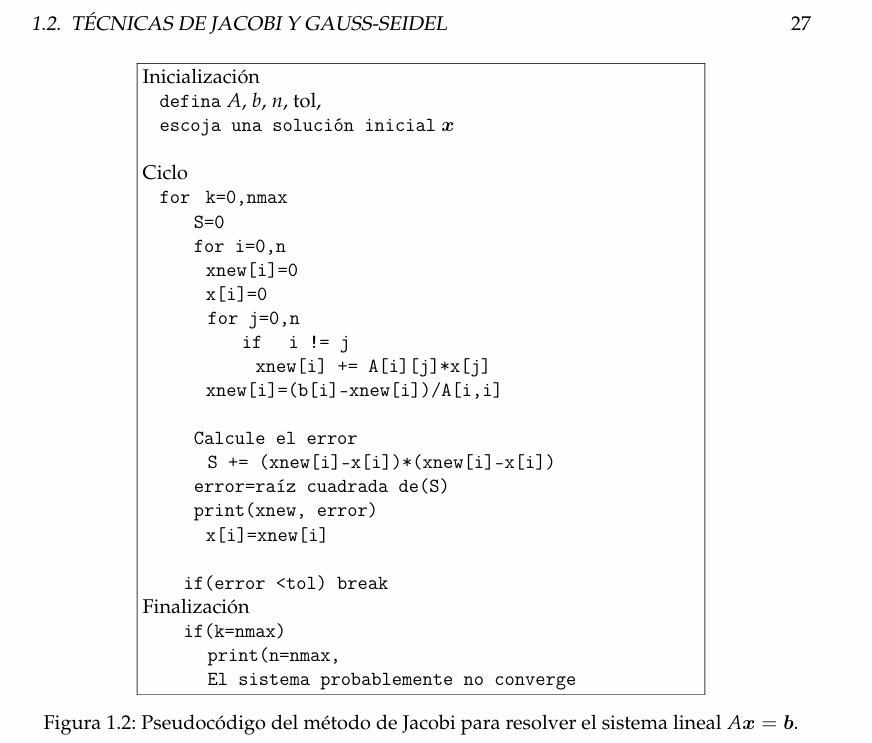

### Ejemplo en `Python`

Matriz

$$A =  \begin{pmatrix} 5 & -2 & 3 \\ -3 & 8 & 1 \\ -3 & -1 & - 6\end{pmatrix}  $$

In [ ]:
import numpy as np
from numpy import linalg as LA

def Jacobi(A, b, nmax, tol):
    n = len(b)

    # extract the diagonal
    D = np.diag(A)

    # subtract diagonal as matrix
    LU = A - np.diag(D)
    x= np.zeros(n) # initial guess
    k=0
    error = 10
    while (k < nmax and tol < error):
        k +=1
        xnew = (b - np.dot(LU, x))/D
        error = LA.norm(xnew-x)
        print("solucion par x para la iteracion $k=%2d con error %5.4f"%(k, error))
        print("   ", xnew)
        x = xnew # rotacion

    if k==nmax:
        print("probablemente no converge")
    return x



In [ ]:
# prueba
A = np.array([[5, -2, 3], [-3, 8, 1], [-3, -1, -6]])

# vector b
b = np.array([-1,4,0])

nmax=100
tol=0.001
Jacobi(A,b,nmax, tol )

solucion par x para la iteracion $k= 1 con error 0.5385
    [-0.2  0.5 -0. ]
solucion par x para la iteracion $k= 2 con error 0.2142
    [0.         0.425      0.01666667]
solucion par x para la iteracion $k= 3 con error 0.1207
    [-0.04        0.49791667 -0.07083333]
solucion par x para la iteracion $k= 4 con error 0.0821
    [ 0.04166667  0.49385417 -0.06298611]
solucion par x para la iteracion $k= 5 con error 0.0503
    [ 0.03533333  0.52349826 -0.10314236]
solucion par x para la iteracion $k= 6 con error 0.0361
    [ 0.07128472  0.5261428  -0.10491638]
solucion par x para la iteracion $k= 7 con error 0.0231
    [ 0.07340694  0.53984632 -0.12333283]
solucion par x para la iteracion $k= 8 con error 0.0171
    [ 0.08993822  0.54294421 -0.12667786]
solucion par x para la iteracion $k= 9 con error 0.0115
    [ 0.0931844   0.54956157 -0.13545981]
solucion par x para la iteracion $k=10 con error 0.0087
    [ 0.10110051  0.55187663 -0.13818579]
solucion par x para la iteracion $k=11 con e

array([ 0.11402125,  0.56121885, -0.15015811])

In [ ]:
# Verificamos la solucion
from scipy.linalg import solve
solve(A,b)

array([ 0.11607143,  0.5625    , -0.15178571])

## Ejemplo de no convergencia

$$A = \begin{pmatrix} 1 & 3 \\ 3 & 1  \end{pmatrix}  $$

In [ ]:
A = np.array([[1,3],[3,1]])
b = np.array([-1, 4])
nmax=10
tol=0.1
Jacobi(A,b,nmax,tol)

solucion par x para la iteracion $k= 1 con error 4.1231
    [-1.  4.]
solucion par x para la iteracion $k= 2 con error 12.3693
    [-13.   7.]
solucion par x para la iteracion $k= 3 con error 37.1080
    [-22.  43.]
solucion par x para la iteracion $k= 4 con error 111.3239
    [-130.   70.]
solucion par x para la iteracion $k= 5 con error 333.9716
    [-211.  394.]
solucion par x para la iteracion $k= 6 con error 1001.9147
    [-1183.   637.]
solucion par x para la iteracion $k= 7 con error 3005.7440
    [-1912.  3553.]
solucion par x para la iteracion $k= 8 con error 9017.2320
    [-10660.   5740.]
solucion par x para la iteracion $k= 9 con error 27051.6960
    [-17221.  31984.]
solucion par x para la iteracion $k=10 con error 81155.0880
    [-95953.  51667.]
probablemente no converge


array([-95953.,  51667.])

Es obvio que no converge, la matriz NO es diagonalmente dominante, ni por filas ni por columnas.

Calculemos en `Python`  el radio espectral.

from numpy.linalg import inv

def radio_espectralJ(A):

In [ ]:
from numpy.linalg import inv

# Ojo, el radio espectral no es de A, es de T=-D^-1(L+U)
def radio_espectralJ(A):
    n = np.size(A,1)

    # extract the diagonal
    D = np.diag(A)

    # subtract the diagonal from the matrix
    LU = A - np.diag(D)
    T = -np.matmul(inv(np.diag(D)), LU)
    autvalores = LA.eigvals(T)
    print("T=")
    print(T)
    print("autovalores de T=")
    print(autvalores)
    return max(abs(autvalores))

In [ ]:
# Prueba

A = np.array([[1,3],[3,1]])
radio_espectralJ(A)


T=
[[-0. -3.]
 [-3. -0.]]
autovalores de T=
[ 3. -3.]


np.float64(3.000000000000001)

### Matriz que converge en Jacobi pero diverge para Gauss-Seidel

$$\begin{pmatrix} 1 & 0 & 1 \\ -1 & 1 & 0 \\ 1 & 2 & - 3\end{pmatrix} $$
Calculemos el radio espectral


In [ ]:
A = np.array([[1, 0, 1], [-1, 1, 0], [1, 2, -3]])
radio_espectralJ(A)


T=
[[-0.         -0.         -1.        ]
 [ 1.         -0.         -0.        ]
 [ 0.33333333  0.66666667 -0.        ]]
autovalores de T=
[ 0.37370763+0.86735546j  0.37370763-0.86735546j -0.74741525+0.j        ]


np.float64(0.9444378697709912)

Converge para $A$ por que $\rho(A) < 1$.

### Matriz que diverge para Jacobi y converge para Gauss Seidel

$$A = \begin{pmatrix} 1 & 0.5 & 0.5 \\ 0.5 & 1 & 0.5 \\ 0.5 & 0.5 & 1 \end{pmatrix}  $$












In [ ]:
A = np.array([[1,0.5,0.5],[0.5,1, 0.5],[0.5,0.5,1]])

# find the spectral ratio
radio_espectralJ(A)
#

b = np.array([1,1,1])

T=
[[-0.  -0.5 -0.5]
 [-0.5 -0.  -0.5]
 [-0.5 -0.5 -0. ]]
autovalores de T=
[ 0.5 -1.   0.5]


In [ ]:
# find the jacobi iterations
nmax=100
tol=0.001
Jacobi(A,b,nmax, tol )

solucion par x para la iteracion $k= 1 con error 1.7321
    [1. 1. 1.]
solucion par x para la iteracion $k= 2 con error 1.7321
    [0. 0. 0.]
solucion par x para la iteracion $k= 3 con error 1.7321
    [1. 1. 1.]
solucion par x para la iteracion $k= 4 con error 1.7321
    [0. 0. 0.]
solucion par x para la iteracion $k= 5 con error 1.7321
    [1. 1. 1.]
solucion par x para la iteracion $k= 6 con error 1.7321
    [0. 0. 0.]
solucion par x para la iteracion $k= 7 con error 1.7321
    [1. 1. 1.]
solucion par x para la iteracion $k= 8 con error 1.7321
    [0. 0. 0.]
solucion par x para la iteracion $k= 9 con error 1.7321
    [1. 1. 1.]
solucion par x para la iteracion $k=10 con error 1.7321
    [0. 0. 0.]
solucion par x para la iteracion $k=11 con error 1.7321
    [1. 1. 1.]
solucion par x para la iteracion $k=12 con error 1.7321
    [0. 0. 0.]
solucion par x para la iteracion $k=13 con error 1.7321
    [1. 1. 1.]
solucion par x para la iteracion $k=14 con error 1.7321
    [0. 0. 0.]
soluci

array([0., 0., 0.])

# Metodo de Gauss-Seidel

$$A = L + D + U $$

$$(L + D) \mathbf{x} + U \mathbf{x} = \mathbf{b} $$
$$ D \mathbf{x} +   L \mathbf{x}=  - U \mathbf{x} + \mathbf{b} \tag{2} $$

$$\mathbf{x}_{k+1} = (L + D)^{-1} ( -U \mathbf{x}_k + \mathbf{b})  $$
$$\mathbf{x}_{k+1} + (L + D)^{-1} ( U \mathbf{x}_k)  = \mathbf{b} $$
Vamos a ver que la memoria no se necesita para los dos vectore $\mathbf{x}_k$, $\mathbf{x}_{k+1}$. Sin embargo para calcular el **error** si se necesitan.

Podemos escribir entonces

$$\mathbf{x}_{k+1} = T_{GS} \mathbf{x}_k + \mathbf{c} $$
donde
$$T_{GS} = -(L+D)^{-1} U \quad , \quad \mathbf{c} = (L+D)^{-1} \mathbf{b} $$

La forma granulada (por componentes)

De la Ecuacion (2)
$$a_{ii} x_i^{(k+1)}  + \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} =-\sum_{j=i+1}^n a_{ij} x_j^{(k)} + b_i  $$

Dividiendo por $a_{ii}$ en la diagonal,

$$ x_i^{(k+1)} =    \frac{1}{a_{ii}} \left ( b_i -  \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} -\sum_{j=i+1}^n a_{ij} x_j^{(k)}  \right )  $$

Vamos a ver un ejemplo con la misma matriz $A$ anterior

$$A =  \begin{pmatrix} 5 & -2 & 3 \\ -3 & 8 & 1 \\ -3 & -1 & - 6\end{pmatrix}  $$


La idea es como sigue

* Se da una solucion inicial (digamos 0).
* De la primera ecuacion $k=0$, se despeja $x_1$ con los valores $x_2=x_3=0$
esto nos resuelve la primera componente $x_1^{(1)}$
* De la segunda ecuacion, despejamos $x_2$, y usamos $x_1^{(1)}$ hallado en el paso anterior y $x_3=0$. Hallamos $x_2^{(1)}$

* De la tercera ecuacion hallamos $x_3$ y usamo $x_1^{(1)}, x_1^{(2)}$ hallados anteriormente.

1. Comenzamos con la primera ecuacion, y la solucion inicial
$$\mathbf{x}_0 = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $$

$$5 x_1 - 2 x_2 + 3 x_3 = -1 $$

$$x_1 = -1/5 = -0.2 $$

2. Ahora para la segunda ecuacion
$$ 3 x_1 + 8 x_2 + x_3 = 4$$
con $x_1=-0.2$, $x_3=0$

$$x_2 = \frac18 (4 + 3(-0.2) - 0)= 0.425 $$

3. La ecuacion 3 es
$$-3 x_1 - x_2 - 6 x_3 = 0  $$
Despejamos $x_3$

$$x_3 = -\frac16 [ 3(-0.2) + 0.425] = 0.0291\overline{6} $$

Calculemos el error



In [ ]:
x2 = np.array([-0.2, 0.425, 0.02916666])

error(x1,x2)

np.float64(0.470612041978906)

Hasta el cuarto vector el error es $<0.1$.

$$sol = \{  
    (0,0,0), (-0.2,0.425,0.0291\overline{6}), (-0.0475, 0.478454, -0.056), (-0.025, 0.51638, -0.09857)
    \} $$

In [ ]:
import numpy as np
from numpy import linalg as LA

def gauss_seidel(A, b, nmax, tol):
    L = np.tril(A) # lower triangular
    U = A-L
    n = len(b)
    x =np.zeros(n) # solucion inicial
    k=0
    error = 10

    LAI = LA.inv(L) # inversa de L

    # Iteraciones de Gauss Seidel
    while( k < nmax and tol < error):
        xnew = np.dot(LAI, b -np.dot(U,x)) # x = -(L+D)^{-1} U x + (L+D)^{-1} b
        error = LA.norm(xnew-x)
        print("solucion para x en iteracion k=%d con error %5.4f"%(k,error))

        print(" ", xnew)
        x = xnew # rotacion
        k +=1

    if k==nmax:
        print("maximo numero de iteraciones fue alcanzado")
        print("probablemente no hay convergencia")

    return x

In [ ]:
# prueba
A = np.array([[5, -2, 3], [-3, 8, 1], [-3,-1,-6]])
print(A)

[[ 5 -2  3]
 [-3  8  1]
 [-3 -1 -6]]


In [ ]:
b = np.array([-1,4,0])

nmax=100
tol=0.001
gauss_seidel(A,b,nmax,tol)

solucion para x en iteracion k=0 con error 0.4706
  [-0.2         0.425       0.02916667]
solucion para x en iteracion k=1 con error 0.1827
  [-0.0475      0.47854167 -0.05600694]
solucion para x en iteracion k=2 con error 0.0922
  [ 0.02502083  0.51638368 -0.09857436]
solucion para x en iteracion k=3 con error 0.0514
  [ 0.06569809  0.53695858 -0.12234214]
solucion para x en iteracion k=4 con error 0.0284
  [ 0.08818872  0.54836354 -0.13548828]
solucion para x en iteracion k=5 con error 0.0157
  [ 0.10063838  0.55467543 -0.1427651 ]
solucion para x en iteracion k=6 con error 0.0087
  [ 0.10752923  0.5581691  -0.1467928 ]
solucion para x en iteracion k=7 con error 0.0048
  [ 0.11134332  0.56010284 -0.14902213]
solucion para x en iteracion k=8 con error 0.0027
  [ 0.11345442  0.56117317 -0.15025607]
solucion para x en iteracion k=9 con error 0.0015
  [ 0.11462291  0.5617656  -0.15093906]
solucion para x en iteracion k=10 con error 0.0008
  [ 0.11526967  0.56209351 -0.15131709]


array([ 0.11526967,  0.56209351, -0.15131709])

In [ ]:
# find the analytic solution to test
from scipy.linalg import solve
solve(A,b)

array([ 0.11607143,  0.5625    , -0.15178571])

### Radio espectral para Gauss Seidel


In [ ]:
def radio_espectralGS(A):
    n = np.size(A)

    # extract lower triangular together with diagonal
    L = np.tril(A) # se trae la diagonal consigo L+D
    U = A - L
    T = -np.matmul( inv(L), U)
    autovalores = LA.eigvals(T)
    print("T=")
    print(T)
    print("autovalores de T=")
    print(autovalores)
    return max(abs(autovalores))


In [ ]:
# prueba
print(A)

[[ 5 -2  3]
 [-3  8  1]
 [-3 -1 -6]]


In [ ]:
radio_espectralGS(A)

T=
[[-0.          0.4        -0.6       ]
 [-0.          0.15       -0.35      ]
 [-0.         -0.225       0.35833333]]
autovalores de T=
[-0.         -0.04516708  0.55350042]


np.float64(0.5535004175943635)

In [ ]:
# ejemplo de no convergencia

A = np.array([[1,3],[3,1]])
print(A)

[[1 3]
 [3 1]]


In [ ]:
b = np.array([-1,4])

nmax=10
tol=0.1
x = gauss_seidel(A, b, nmax, tol)


solucion para x en iteracion k=0 con error 7.0711
  [-1.  7.]
solucion para x en iteracion k=1 con error 66.4078
  [-22.  70.]
solucion para x en iteracion k=2 con error 597.6705
  [-211.  637.]
solucion para x en iteracion k=3 con error 5379.0343
  [-1912.  5740.]
solucion para x en iteracion k=4 con error 48411.3087
  [-17221.  51667.]
solucion para x en iteracion k=5 con error 435701.7783
  [-155002.  465010.]
solucion para x en iteracion k=6 con error 3921316.0047
  [-1395031.  4185097.]
solucion para x en iteracion k=7 con error 35291844.0419
  [-12555292.  37665880.]
solucion para x en iteracion k=8 con error 317626596.3775
  [-1.12997641e+08  3.38992927e+08]
solucion para x en iteracion k=9 con error 2858639367.3978
  [-1.01697878e+09  3.05093635e+09]
maximo numero de iteraciones fue alcanzado
probablemente no hay convergencia


In [ ]:
# veamos que la inversa si existe
inv(A)

array([[-0.125,  0.375],
       [ 0.375, -0.125]])

In [ ]:
# solve Ax=b
LA.solve(A,b)

array([ 1.625, -0.875])

## Mas ejemplos
### Matriz de convergencia para Jacobi y divergencia para Gauss-Seidel

$$ A= \begin{pmatrix} 1 & 0 & 1 \\ -1 & 1 & 0 \\ 1 & 2 & -3\end{pmatrix}  $$

In [ ]:
A = np.array([[1, 0, 1],[-1,1,0],[1,2,-3]])
radio_espectralJ(A)

T=
[[-0.         -0.         -1.        ]
 [ 1.         -0.         -0.        ]
 [ 0.33333333  0.66666667 -0.        ]]
autovalores de T=
[ 0.37370763+0.86735546j  0.37370763-0.86735546j -0.74741525+0.j        ]


np.float64(0.9444378697709912)

In [ ]:
radio_espectralGS(A)

T=
[[-0. -0. -1.]
 [-0. -0. -1.]
 [-0. -0. -1.]]
autovalores de T=
[-0. -0. -1.]


np.float64(1.0)

In [ ]:
b = np.array([1,1,1])

print("Iteraciones para Jacobi")
nmax=100
tol=0.1
x = Jacobi(A, b, nmax, tol)


print("\n\nIteraciones para Gauss Seidel")
nmax=100
tol=0.1
x = gauss_seidel(A, b, nmax, tol)

Iteraciones para Jacobi
solucion par x para la iteracion $k= 1 con error 1.4530
    [ 1.          1.         -0.33333333]
solucion par x para la iteracion $k= 2 con error 1.4530
    [1.33333333 2.         0.66666667]
solucion par x para la iteracion $k= 3 con error 1.3100
    [0.33333333 2.33333333 1.44444444]
solucion par x para la iteracion $k= 4 con error 1.2717
    [-0.44444444  1.33333333  1.33333333]
solucion par x para la iteracion $k= 5 con error 1.2143
    [-0.33333333  0.55555556  0.40740741]
solucion par x para la iteracion $k= 6 con error 1.0495
    [ 0.59259259  0.66666667 -0.07407407]
solucion par x para la iteracion $k= 7 con error 1.1116
    [1.07407407 1.59259259 0.30864198]
solucion par x para la iteracion $k= 8 con error 0.9916
    [0.69135802 2.07407407 1.08641975]
solucion par x para la iteracion $k= 9 con error 0.8882
    [-0.08641975  1.69135802  1.27983539]
solucion par x para la iteracion $k=10 con error 0.9523
    [-0.27983539  0.91358025  0.7654321 ]
solucion

### Matriz de iteraciones que converge en Gauss-Seidel pero diverge en Jacobi

$$A = \begin{pmatrix} 1 & 0.5 & 0.5 \\ 0.5 & 1 & 0.5 \\ 0.5 & 0.5 & 1 \end{pmatrix}  $$

Ya vimos que esta matriz no converge con Jacobi. Veamos que si converge con Gauss-Seidel

In [ ]:
A = np.array([[1, 0.5, 0.5], [0.5,1,0.5], [0.5,0.5,1]])
radio_espectralGS(A)

T=
[[-0.    -0.5   -0.5  ]
 [-0.     0.25  -0.25 ]
 [-0.     0.125  0.375]]
autovalores de T=
[-0.    +0.j          0.3125+0.16535946j  0.3125-0.16535946j]


np.float64(0.35355339059327373)

In [ ]:
print("\n\nIteraciones para Gauss Seidel")
nmax=100
tol=0.001
x = gauss_seidel(A, b, nmax, tol)



Iteraciones para Gauss Seidel
solucion para x en iteracion k=0 con error 1.1456
  [1.   0.5  0.25]
solucion para x en iteracion k=1 con error 0.4110
  [0.625   0.5625  0.40625]
solucion para x en iteracion k=2 con error 0.1301
  [0.515625   0.5390625  0.47265625]
solucion para x en iteracion k=3 con error 0.0381
  [0.49414062 0.51660156 0.49462891]
solucion para x en iteracion k=4 con error 0.0124
  [0.49438477 0.50549316 0.50006104]
solucion para x en iteracion k=5 con error 0.0051
  [0.4972229  0.50135803 0.50070953]
solucion para x en iteracion k=6 con error 0.0021
  [0.49896622 0.50016212 0.50043583]
solucion para x en iteracion k=7 con error 0.0008
  [0.49970102 0.49993157 0.5001837 ]


# Proxima clase
**Teorema 1.2.2**: Si $A$ es estrictamente diagonal dominante por filas (columnas) entonces la iteracion Gauss-Seidel

$$\mathbf{x}_{k+1} = T \mathbf{x}_k + \mathbf{c} $$

Con
$T=-(L+D)^{-1} U$ y $L$ triangular inferior con ceros en la diagonal
$U$ triangular superior con ceros en la digonal y $D$ diagonal (sin ceros),
**converge**.